In [2]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

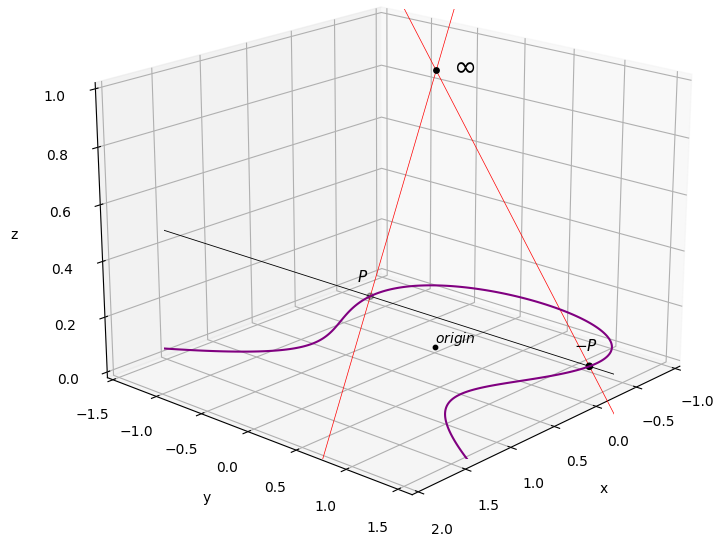

In [110]:
fig = plt.figure()
ax = plt.axes(projection='3d')


a = -1
b = 1

x = np.linspace(-10,10,1000)
y = np.linspace(-10,10,1000)
X,Y = np.meshgrid(x,y)
Z = Y**2 - X**3 - a*X - b
ax.contour(X,Y,Z,[0],colors='purple')

# change the axes to the intersecting lines at the origin
# ax.plot([0,0],[-10,10],[0,0],c='k')
# ax.plot([-10,10],[0,0],[0,0],c='k')
# ax.plot([0,0],[0,0],[-10,10],c='k')

ax.set_xlim(-1,2)
ax.set_ylim(-1.5,1.57)
ax.set_zlim(0,1)


ax.scatter(0,0,0,c='k',s=10)
ax.text(0,0,0.02,r'$origin$',size=10,zorder=1,color='k')

def curve(x, sign):
    return np.sqrt(x**3 + a*x + b) * sign

# the inverse points

points = [
  [-0.5, -0.5],
  [curve(-0.5, 1), curve(-0.5, -1)]
]

ax.scatter(xs=points[0],ys=points[1],zs=[0,0], c='k', s=20, zorder=3)


#draw lines through the points and (0,0,1) extending all the way
# get the line equation from the points
# 3d line eq
def line_eq(p1, p2):
    x1, y1, z1 = p1
    x2, y2, z2 = p2
    # direction vector
    v = [x2-x1, y2-y1, z2-z1]
    return v

tuples = [(-0.5,curve(-0.5,1),0), (-0.5,curve(-0.5,-1),0)]
  
for point in tuples:
    dv = line_eq(point, [0,0,1])
    
    t = np.linspace(-10,10,1000)
    x = point[0] + dv[0]*t
    y = point[1] + dv[1]*t
    z = point[2] + dv[2]*t
    ax.plot(x,y,z,zorder=1,linewidth=0.5, c='red')

y = np.linspace(-10,10,1000)
x = y*0-0.5

ax.plot(x,y,zorder=1,linewidth=0.6, c='black')

text = [r'$P$', r'$-P$']

for i, p in enumerate(tuples):
    ax.text(p[0]-.05, p[1]-.2, 0.03, text[i-1], size=11, zorder=1, color='k')

ax.scatter(0,0,1,c='k',s=15)

ax.text(-0.02,0.15,1,r'$\infty$',size=20,zorder=1,color='k')


# change the viewing angle
ax.view_init(19, 42)


# label axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax.dist = 7
# please
plt.tight_layout()
#this looks bad

plt.savefig('3dplot.png', dpi=400)


